# Ausreißer eliminieren

## <span style="color:red">Schritt 1: Import des Atticus Finch Datensatzes von GitHub</span>

In [1]:
import pandas as pd

# URL des Atticus Finch Datensatzes
url = 'https://raw.githubusercontent.com/OJanz/AtticusFinch/main/AtticusFinchSalesData_v1.csv'  

# Daten in Pandas Data Frame einlesen
df = pd.read_csv(url)

# Die ersten fünf Datensätze ausgeben
print(df.head())

   Store-ID  Frequency  TiM   PPP  Central  Space  Sales
0        59       4740  198   268     1.18    364    710
1        60       7703  367  1314     1.10    802   2367
2        61       9928  303  1046     1.62    926   2325
3        62      10139  644  1290     1.46   1269   3284
4        63      11170  902  1142     1.00   1149   2429


## <span style="color:red">Schritt 2: Variablen auswählen, die bereinigt werden sollen</span>

In [2]:
# Liste mit Variablen, die bereinigt werden sollen
variablen_bereinigen = ['Frequency', 'Sales'] 

# in df nur Variablen behalten, die in der Liste 'variablen_bereinigen' stehen
df = df[variablen_bereinigen] 

print(df.head())

   Frequency  Sales
0       4740    710
1       7703   2367
2       9928   2325
3      10139   3284
4      11170   2429


## <span style="color:red">Schritt 3: Funktion zur Anwendung der IQR-Methode</span>
Ausreißer mit Hilfe der Interquartile Range (IQR) Methode eliminieren

In [3]:
#--------------------------------------------------------
# FUNKTION ZUR ELIMINIERUNG VON AUSREISSERN
#--------------------------------------------------------

def remove_outliers_iqr(df):
    
    # IQR berechnen und die Grenzen für Ausreißer je Variable (Spalte) berechnen
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Daten filtern, um Ausreißer zu entfernen
    outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    # DataFrame mit den Ausreißern erstellen
    no_outliers = df[~df.index.isin(outliers.index)]

    # bereinigte Daten und Ausreißer zurückgeben
    return no_outliers, outliers

## <span style="color:red">Schritt 4: Funktion aufrufen und Ausreißer entfernen</span>

In [4]:
df_no_outliers, df_outliers = remove_outliers_iqr(df)

print(f'Anzahl eliminierter Stores: {len(df_outliers)}')
print(f'Anzahl Stores nach Bereinigung: {len(df_no_outliers)}')

Anzahl eliminierter Stores: 13
Anzahl Stores nach Bereinigung: 146


## <span style="color:red">Schritt 5: Bereinigte Daten und Ausreißer in Scatterplot visualisieren</span>

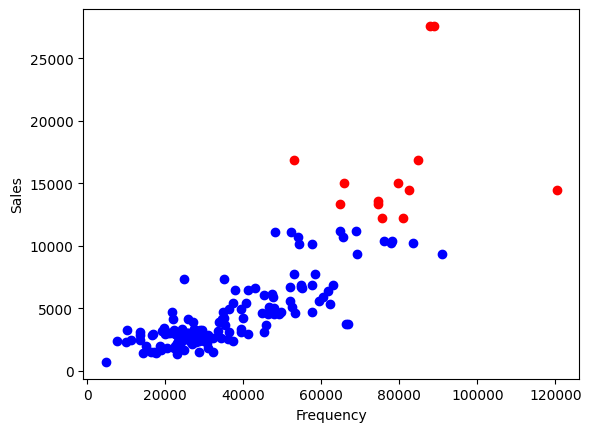

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


# Scatterplot für bereinigte Daten
plt.scatter(df_no_outliers['Frequency'], df_no_outliers['Sales'], color='blue')

# Scatterplot für Ausreißer
plt.scatter(df_outliers['Frequency'], df_outliers['Sales'], color='red')

plt.xlabel('Frequency')
plt.ylabel('Sales')

# Zeige den Plot an
plt.show()

## <span style="color:red">Schritt 6: Einfluss der Maßnahme auf Modell-Parameter und Modellgüte berechnen</span>

In [6]:
import statsmodels.api as sm
from sklearn import metrics
import numpy as np

# Frequency als Prädiktor und Sales als abhängige Variable aus Data Frame auswählen
X = df_no_outliers['Frequency']
y = df_no_outliers['Sales']

# Konstante hinzufügen um Achsenabschnitt schätzen zu können
X = sm.add_constant(X)

# Erstellen des linearen Regressionsmodells
model = sm.OLS(y, X)
results = model.fit()

# Vorhersagen auf der Grundlage des Modells
y_pred = results.predict(X)

# Steigung und Achsenabschnitt ausgeben
print("Regressionskoeffizienten:")
print(results.params)

# Berechnen der Gütemaße
print('\nMean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred).round(4))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)).round(4))
print('R-squared (R2):', metrics.r2_score(y, y_pred).round(4))

Regressionskoeffizienten:
const       -56.922815
Frequency     0.120091
dtype: float64

Mean Absolute Error (MAE): 1116.8488
Root Mean Squared Error (RMSE): 1511.9747
R-squared (R2): 0.6467


| Kennzahl | vor Bereinigung | nach Bereinigung |
|----------|-:|-:|
| MAE      |1654|1117|
| RMSE     |2562|1512|
| R2       |0.6547|0.6467|